In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from astropy.cosmology import Planck18
import h5py
import seaborn as sns
import pandas as pd

# N1e7_Fiducial_AllDCO_AIS

In [2]:
var = "N1e7_Fiducial_AllDCO_AIS"

h_marg = []
Om_marg = []

with h5py.File("../BNS_Compare_Pop_Model/"+var+"/inference_marginal.h5",'r') as hf:
    for i in [1]:
        h_marg.append(np.array(hf['h'+str(i)]))
        Om_marg.append(np.array(hf['Om'+str(i)]))
hf.close()

In [3]:
h_full = []
Om_full = []
with h5py.File("../BNS_Compare_Pop_Model/"+var+"/inference_full.h5",'r') as hf:
    for i in [1]:
        h_full.append(np.array(hf['h'+str(i)]))
        Om_full.append(np.array(hf['Om'+str(i)]))
hf.close()

In [4]:
data = {
    'Hubble Constant (in km/s/Mpc)': np.array([h_full[0], h_marg[0]]).flatten()*100,
    'Dark Matter Density': np.array([Om_full[0], Om_marg[0]]).flatten(),
    'Population': np.array([np.full(h_full[0].shape[0], r'Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$', dtype=object), 
            np.full(h_marg[0].shape[0], r'Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$', dtype=object)]).flatten()
}

df = pd.DataFrame(data)
print(df)

      Hubble Constant (in km/s/Mpc)  Dark Matter Density  \
0                         66.822342             0.307557   
1                         67.623245             0.301289   
2                         67.151291             0.310468   
3                         67.560600             0.300206   
4                         66.845589             0.321288   
...                             ...                  ...   
1995                      68.163773             0.282499   
1996                      68.112480             0.280984   
1997                      68.714317             0.253224   
1998                      68.911270             0.266013   
1999                      68.774887             0.269651   

                                             Population  
0     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
1     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
2     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
3     Correlated Pop: $\pi(M_c, q, z) \neq \pi(

/home/soumendrakishore.roy/.conda/envs/popcosmo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/soumendrakishore.roy/.conda/envs/popcosmo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


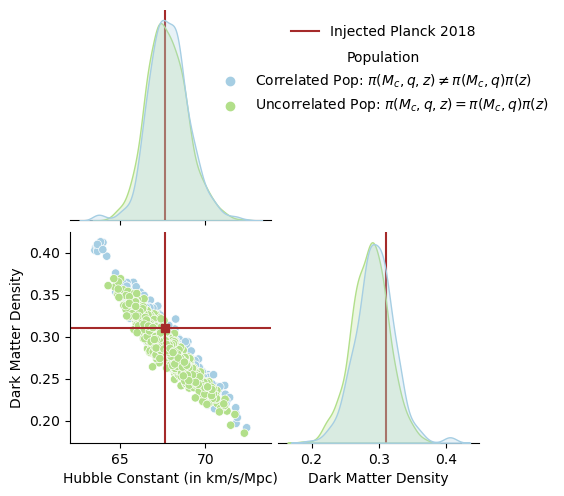

In [5]:
sns.set_palette("colorblind")
my_palette = {r"Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$": "#A6CEE3", r"Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$": "#B2DF8A"}

fig = sns.pairplot(df, hue="Population", diag_kind="kde", palette=my_palette, corner=True)

true = np.array([Planck18.H0.value,Planck18.Om0])
# Extract the axes
axes = np.array(fig.axes).reshape((len(true), len(true)))

# Loop over the diagonal
for i in range(len(true)):
    ax = axes[i, i]
    ax.axvline(true[i], color="brown")



# Loop over the histograms
for yi in range(len(true)):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true[xi], color="brown")
        ax.axhline(true[yi], color="brown")
        ax.plot(true[xi], true[yi], marker="s", color="brown")
sns.move_legend(fig, "upper center", bbox_to_anchor=(0.46, 0.92))
#fig.add_legend()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="Injected Planck 2018")

plt.legend(handles=[brown_line], bbox_to_anchor=(0., 1.95, 1., .0), loc=6, frameon=False)
plt.savefig(var+"_H0_Om.pdf", bbox_inches="tight");

# N1e7_MullerMandel_AllDCO_AIS

In [6]:
var = "N1e7_MullerMandel_AllDCO_AIS"

h_marg = []
Om_marg = []

with h5py.File("../BNS_Compare_Pop_Model/"+var+"/inference_marginal.h5",'r') as hf:
    for i in [1]:
        h_marg.append(np.array(hf['h'+str(i)]))
        Om_marg.append(np.array(hf['Om'+str(i)]))
hf.close()

In [8]:
h_full = []
Om_full = []
with h5py.File("../BNS_Compare_Pop_Model/"+var+"/inference_full.h5",'r') as hf:
    for i in [1]:
        h_full.append(np.array(hf['h'+str(i)]))
        Om_full.append(np.array(hf['Om'+str(i)]))
hf.close()

In [9]:
data = {
    'Hubble Constant (in km/s/Mpc)': np.array([h_full[0], h_marg[0]]).flatten()*100,
    'Dark Matter Density': np.array([Om_full[0], Om_marg[0]]).flatten(),
    'Population': np.array([np.full(h_full[0].shape[0], r'Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$', dtype=object), 
            np.full(h_marg[0].shape[0], r'Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$', dtype=object)]).flatten()
}

df = pd.DataFrame(data)
print(df)

      Hubble Constant (in km/s/Mpc)  Dark Matter Density  \
0                         66.266167             0.302551   
1                         67.034218             0.297466   
2                         66.473732             0.309834   
3                         66.875984             0.300169   
4                         66.017586             0.322680   
...                             ...                  ...   
1995                      66.523682             0.303446   
1996                      66.932640             0.313238   
1997                      67.492157             0.270354   
1998                      68.091026             0.287741   
1999                      68.177002             0.272405   

                                             Population  
0     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
1     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
2     Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, ...  
3     Correlated Pop: $\pi(M_c, q, z) \neq \pi(

/home/soumendrakishore.roy/.conda/envs/popcosmo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/soumendrakishore.roy/.conda/envs/popcosmo/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


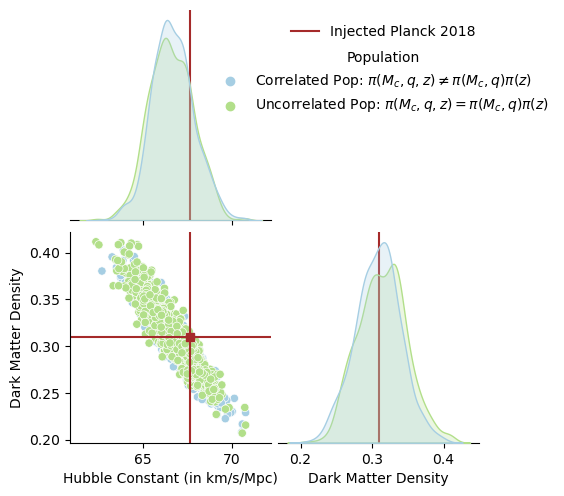

In [10]:
sns.set_palette("colorblind")
my_palette = {r"Correlated Pop: $\pi(M_c, q, z) \neq \pi(M_c, q)\pi(z)$": "#A6CEE3", r"Uncorrelated Pop: $\pi(M_c, q, z) = \pi(M_c, q)\pi(z)$": "#B2DF8A"}

fig = sns.pairplot(df, hue="Population", diag_kind="kde", palette=my_palette, corner=True)

true = np.array([Planck18.H0.value,Planck18.Om0])
# Extract the axes
axes = np.array(fig.axes).reshape((len(true), len(true)))

# Loop over the diagonal
for i in range(len(true)):
    ax = axes[i, i]
    ax.axvline(true[i], color="brown")



# Loop over the histograms
for yi in range(len(true)):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(true[xi], color="brown")
        ax.axhline(true[yi], color="brown")
        ax.plot(true[xi], true[yi], marker="s", color="brown")
sns.move_legend(fig, "upper center", bbox_to_anchor=(0.46, 0.92))
#fig.add_legend()

import matplotlib.lines as mlines

brown_line = mlines.Line2D([], [], color="brown", label="Injected Planck 2018")

plt.legend(handles=[brown_line], bbox_to_anchor=(0., 1.95, 1., .0), loc=6, frameon=False)
plt.savefig(var+"_H0_Om.pdf", bbox_inches="tight");